In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import numpy as np
from collections import Counter
from nltk import ngrams
import gensim
from gensim import corpora
from pprint import pprint
nlp = spacy.load("en_core_web_sm")

In [86]:
def check_concatenated_strings(data):
    return all("," in i for i in data)

def flatten_nested_lists(data):
    return [item.strip() for row in data for item in row]

def calculate_frequency_dict(data):
    count = {}
    for i in data:
        count[i] = count.get(i, 0) + 1
    return count

def create_frequency_dict(data):
    cleaned_data = None
    count = None
    if check_concatenated_strings(data):
        cleaned_data = [x.split(",") for x in data]
        cleaned_data = flatten_nested_lists(cleaned_data)
        count = calculate_frequency_dict(cleaned_data)
    else:
        count = calculate_frequency_dict(data)
    return count

def split_string_list(lst):
    result = [word.strip() for item in lst if item for word in item.split(",")]
    return [item for item in result if item]

def create_mixed_frequency_dict(data):
    cleaned_data = split_string_list(data)
    count = calculate_frequency_dict(cleaned_data)
    return count

def create_horizontal_bar_chart(frequency_dict, xlabel=None, ylabel=None, title=None):
    categories = list(frequency_dict.keys())
    counts = list(frequency_dict.values())

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=categories, hue=categories, palette="viridis")

    if xlabel: plt.xlabel(xlabel, fontsize=14)
    if ylabel: plt.ylabel(ylabel, fontsize=14)
    if title: plt.title(title, fontsize=16)

    return plt

def is_token_allowed(token):
     return bool(
        token
         and str(token).strip()
         and not token.is_stop
         and not token.is_punct
    )

def preprocess_token(token):
     return token.lemma_.strip().lower()

def preprocess_text(raw_text):
    if raw_text is None:
        return ""
    non_empty_text = [x for x in raw_text if x is not None]
    combined_text = ' '.join(non_empty_text)
    complete_doc = nlp(combined_text)
    complete_filtered_tokens = [
        preprocess_token(token)
        for token in complete_doc
        if is_token_allowed(token)
    ]
    return complete_filtered_tokens

def preprocess_topic_modeling(docs):
    processed_docs = []
    for doc in docs:
        if doc is None:
            continue
        complete_doc = nlp(doc)
        complete_filtered_tokens = [
            preprocess_token(token)
            for token in complete_doc
            if is_token_allowed(token)
        ]
        processed_docs.append(complete_filtered_tokens)
        return processed_docs

def generate_topics_modeling(texts, num_topics=3):
    # Create a dictionary from the tokenized texts
    dictionary = corpora.Dictionary(texts)
    # Create a corpus from the dictionary
    corpus = [dictionary.doc2bow(text) for text in texts]
    # Build the LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
    return lda_model
    
def generate_ngrams(tokens, n=3):
    # Generate n-grams
    n_grams = ngrams(tokens, n)
    # Count the occurrences of each n-gram
    n_gram_counts = Counter(n_grams)
    return n_gram_counts

In [20]:
df = pd.read_csv("data.csv")
df = df.replace(np.nan, None)
df.head(10)

Timestamp             1.) What is your field of expertise?  \
0  27/04/2022 15:08:10               Structural biology, Bioinformatics   
1  29/04/2022 12:57:29               Structural biology, Bioinformatics   
2  06/05/2022 10:47:14               Structural biology, Bioinformatics   
3  06/05/2022 11:52:09  Structural biology, Cheminformatics, Enzymology   
4  06/05/2022 20:34:52               Structural biology, Bioinformatics   
5  09/05/2022 09:14:29                               Physics/Biophysics   
6  08/07/2022 15:58:44                                   Bioinformatics   

  2.) What is your current role?  \
0                Staff scientist   
1                Staff scientist   
2                   Project lead   
3                 PDBe annotator   
4                     Biocurator   
5                Staff scientist   
6                Staff scientist   

  3.) How often do you use PDB structures in your work?  \
0                                              Daily      
1                                              Daily      
2                                              Daily      
3                                              Daily      
4                                              Daily      
5                                              Daily      
6                                              Daily      

  4.) How relevant are macromolecular complexes for your work?  \
0                                               None             
1                                               None             
2                                               None             
3                                               None             
4                                               None             
5                                               None             
6                                                5.0             

  5.) How would you use PDB structures of macromolecular complexes in your work? (Optional)  \
0                                               None                                          
1                                               None                                          
2                                               None                                          
3                                               None                                          
4                                               None                                          
5                                               None                                          
6           Clustering protein conformational states                                          

  1.) What summary information should be available for a specific complex?  \
0  What is the name of the complex?, What are the...                         
1  What is the name of the complex?, What are the...                         
2  What is the name of the complex?, What are the...                         
3  What is the name of the complex?, What are the...                         
4  What are the constituent chains that make up t...                         
5  What is the name of the complex?, What are the...                         
6  The name of the complex, The components that m...                         

  2.) What other summary information do you think should be available for the complex? (Optional)  \
0                                               None                                                
1                                               None                                                
2  Perhaps gene names of the constituent componen...                                                
3                                               None                                                
4  I want to know how the complex was observed, X...                                                
5  Perhaps no of Interfaces, molecular weight or ...                                                
6                           

In [21]:
df.columns = ['timestamp', 'area_of_expertise', 'current_role', 'time_spent', 'relevance', 'current_use', 'summary_info', 'other_summary_info', 'structure_info', 'structure_comparison_features', 'other_structure_info', 'ligand_info', 'other_ligand_info', 'complex_annotations', 'complex_external_resources', 'other_comments', 'contacts_preferences', 'email']

In [22]:
df.head(10)

timestamp                                area_of_expertise  \
0  27/04/2022 15:08:10               Structural biology, Bioinformatics   
1  29/04/2022 12:57:29               Structural biology, Bioinformatics   
2  06/05/2022 10:47:14               Structural biology, Bioinformatics   
3  06/05/2022 11:52:09  Structural biology, Cheminformatics, Enzymology   
4  06/05/2022 20:34:52               Structural biology, Bioinformatics   
5  09/05/2022 09:14:29                               Physics/Biophysics   
6  08/07/2022 15:58:44                                   Bioinformatics   

      current_role time_spent relevance  \
0  Staff scientist      Daily      None   
1  Staff scientist      Daily      None   
2     Project lead      Daily      None   
3   PDBe annotator      Daily      None   
4       Biocurator      Daily      None   
5  Staff scientist      Daily      None   
6  Staff scientist      Daily       5.0   

                                current_use  \
0                                      None   
1                                      None   
2                                      None   
3                                      None   
4                                      None   
5                                      None   
6  Clustering protein conformational states   

                                        summary_info  \
0  What is the name of the complex?, What are the...   
1  What is the name of the complex?, What are the...   
2  What is the name of the complex?, What are the...   
3  What is the name of the complex?, What are the...   
4  What are the constituent chains that make up t...   
5  What is the name of the complex?, What are the...   
6  The name of the complex, The components that m...   

                                  other_summary_info  \
0                                               None   
1                                               None   
2  Perhaps gene names of the constituent componen...   
3                                               None   
4  I want to know how the complex was observed, X...   
5  Perhaps no of Interfaces, molecular weight or ...   
6                                               None   

                                      structure_info  \
0  Number of structures for a particular macromol...   
1  Number of structures for a particular macromol...   
2  Number of structures for a particular macromol...   
3  Number of structures for a particular macromol...   
4  Number of structures for a particular macromol...   
5  Number of structures for a particular macromol...   
6  Number of available PDB structures for a speci...   

                       structure_comparison_features  \
0  Molecular interactions between different chain...   
1                                Location of ligands   
2                                Location of ligands   
3                                Location of ligands   
4                   Measure of structural similarity   
5  Molecular interactions between different chain...   
6                   Measure of structural similarity   

                                other_structure_info  \
0                                               None   
1                                               None   
2  I would need options to download the structure...   
3                                               None   
4                                               None   
5  Perhaps Information about the interfaces :no o...   
6                                               None   

                                         ligand_info  \
0  Roles of these ligands, if known (e.g. inhibit...   
1  Roles of these ligands, if known (e.g. inhibit...   
2  Roles of these ligands, if known (e.g. inhibit...   
3  Roles of these ligands, if known (e.g. inhibit...   
4  Possible ligands that can bind to the complex ...   
5  Ligand binding sites in the complex, Conservat...   
6  Distinct ligand binding sites in the complex, ... 

In [23]:
# Convert columns into lists
area_of_expertise = df['area_of_expertise'].tolist()
current_role = df['current_role'].tolist()
time_spent = df['time_spent'].tolist()
relevance = df['relevance'].tolist()
current_use = df['current_use'].tolist()
summary_info = df['summary_info'].tolist()
other_summary_info = df['other_summary_info'].tolist()
structure_info = df['structure_info'].tolist()
structure_comparison_features = df['structure_comparison_features'].tolist()
other_structure_info = df['other_structure_info'].tolist()
ligand_info = df['ligand_info'].tolist()
other_ligand_info = df['other_ligand_info'].tolist()
complex_annotations = df['complex_annotations'].tolist()
complex_external_resources = df['complex_external_resources'].tolist()
other_comments = df['other_comments'].tolist()
contacts_preferences = df['contacts_preferences'].tolist()
email = df['email'].tolist()

### What is your background?

1) What is your area of research?

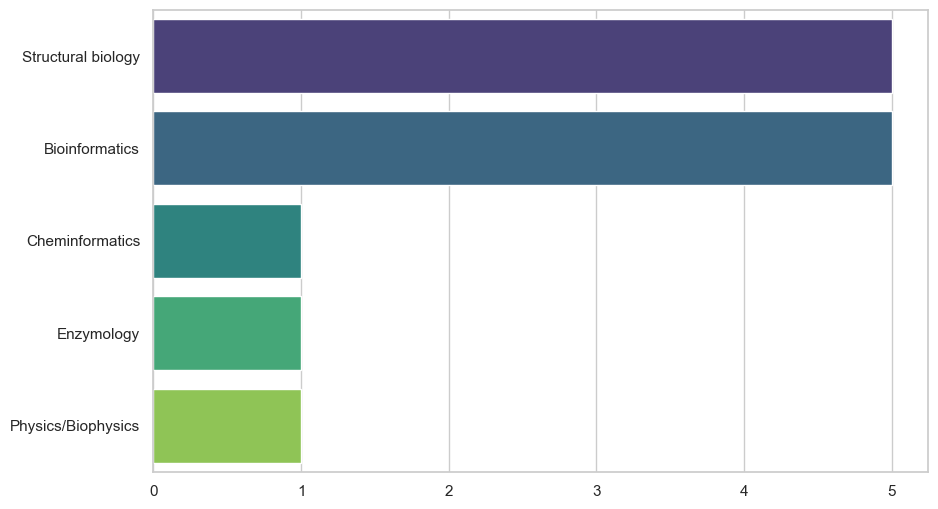

In [88]:
expertise_dict = create_mixed_frequency_dict(area_of_expertise)
plot = create_horizontal_bar_chart(expertise_dict)
plot.show()

2. What is your current role?

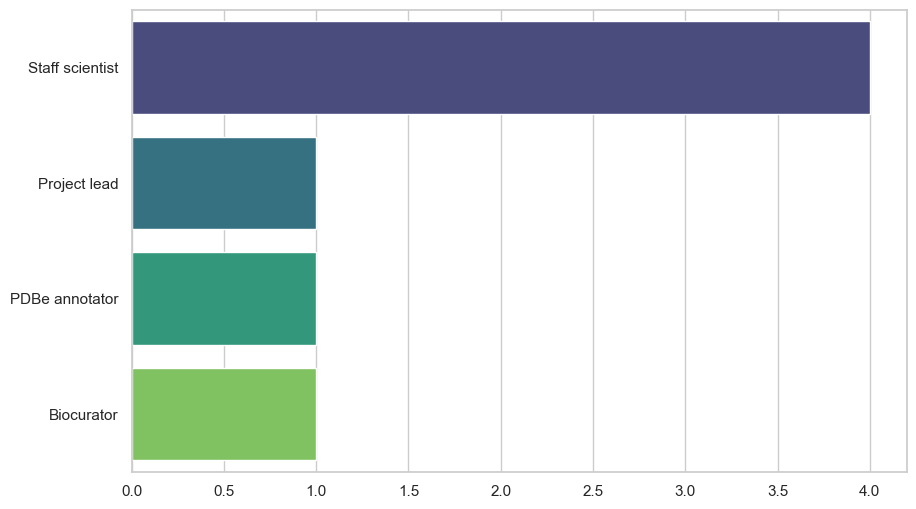

In [90]:
current_role_dict = create_mixed_frequency_dict(current_role)
plot = create_horizontal_bar_chart(current_role_dict)
plot.show()

3. How often do you use PDB structures in your work?

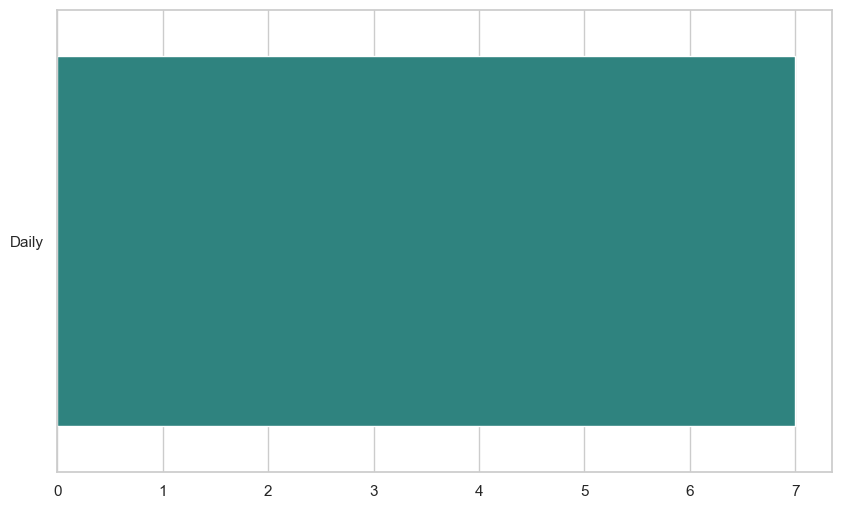

In [91]:
time_spent_dict = create_mixed_frequency_dict(time_spent)
plot = create_horizontal_bar_chart(time_spent_dict)
plot.show()

4. How relevant are macromolecular complexes for your work?

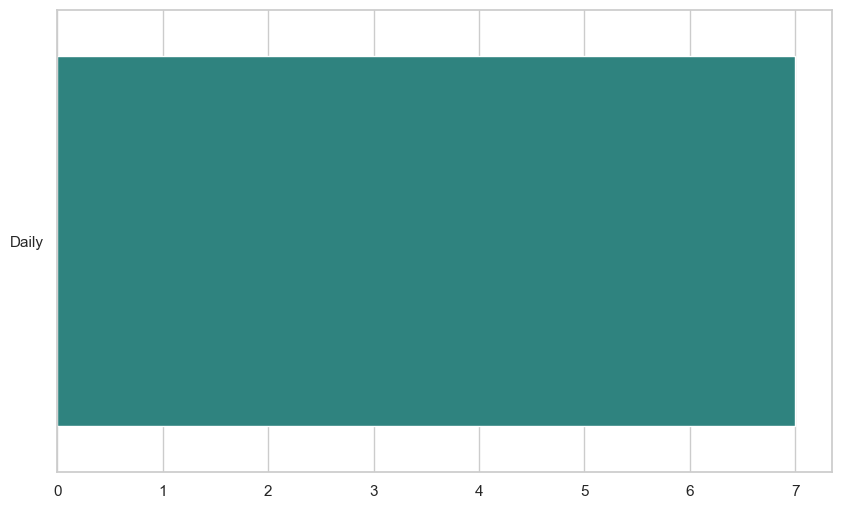

In [94]:
relevance_dict = create_mixed_frequency_dict(time_spent)
plot = create_horizontal_bar_chart(relevance_dict)
plot.show()

5. How would you use PDB structures of macromolecular complexes in your work? (Optional)

In [29]:
tokens = preprocess_text(current_use)

In [30]:
# What are 10 most common words?
Counter(tokens).most_common(10)

[('cluster', 1), ('protein', 1), ('conformational', 1), ('state', 1)]

In [37]:
# What are 10 most common trigrams?
result = generate_ngrams(tokens)
result.most_common(10)

[(('cluster', 'protein', 'conformational'), 1),
 (('protein', 'conformational', 'state'), 1)]

In [60]:
texts = preprocess_topic_modeling(current_use)
model = generate_topics_modeling(texts)
# Print the 3 main topics
pprint(model.print_topics())

[(0,
  '0.250*"conformational" + 0.250*"state" + 0.250*"cluster" + 0.250*"protein"'),
 (1,
  '0.250*"cluster" + 0.250*"protein" + 0.250*"conformational" + 0.250*"state"'),
 (2,
  '0.250*"state" + 0.250*"protein" + 0.250*"conformational" + 0.250*"cluster"')]


### Summary

1.) What summary information should be available for a specific complex?

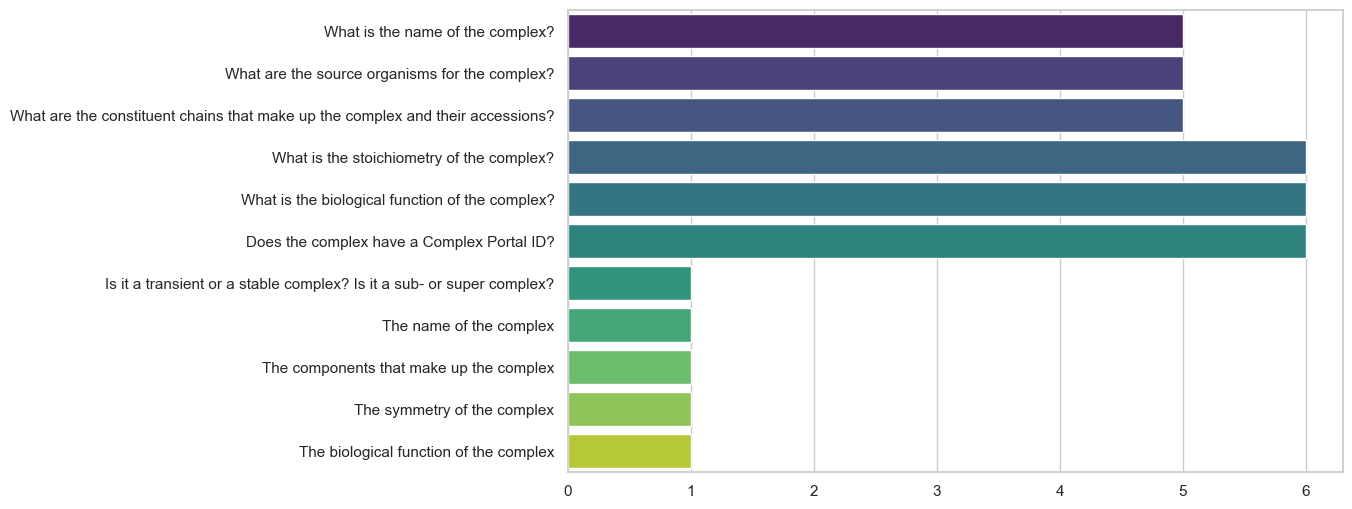

In [32]:
summary_info_dict = create_frequency_dict(summary_info)
plot = create_horizontal_bar_chart(summary_info_dict)
plot.show()

2.) What other summary information do you think should be available for the complex? (Optional)

In [61]:
tokens = preprocess_text(other_summary_info)

In [62]:
# What are 10 most common words?
Counter(tokens).most_common(10)

[('datum', 4),
 ('complex', 3),
 ('observe', 2),
 ('gene', 1),
 ('name', 1),
 ('constituent', 1),
 ('component', 1),
 ('maybe', 1),
 ('term', 1),
 ('image', 1)]

In [63]:
# What are 10 most common trigrams?
result = generate_ngrams(tokens)
result.most_common(10)

[(('gene', 'name', 'constituent'), 1),
 (('name', 'constituent', 'component'), 1),
 (('constituent', 'component', 'maybe'), 1),
 (('component', 'maybe', 'term'), 1),
 (('maybe', 'term', 'image'), 1),
 (('term', 'image', 'interactive'), 1),
 (('image', 'interactive', 'view'), 1),
 (('interactive', 'view', 'representative'), 1),
 (('view', 'representative', 'structure'), 1),
 (('representative', 'structure', 'option'), 1)]

In [65]:
texts = preprocess_topic_modeling(other_summary_info)
model = generate_topics_modeling(texts)
# Print the 3 main topics
pprint(model.print_topics())

[(0,
  '0.063*"pdb" + 0.063*"constituent" + 0.063*"maybe" + 0.063*"name" + '
  '0.063*"image" + 0.063*"term" + 0.063*"download" + 0.062*"option" + '
  '0.062*"representative" + 0.062*"view"'),
 (1,
  '0.063*"representative" + 0.063*"entry" + 0.063*"name" + 0.063*"constituent" '
  '+ 0.063*"term" + 0.063*"pdb" + 0.063*"download" + 0.063*"component" + '
  '0.062*"structure" + 0.062*"interactive"'),
 (2,
  '0.063*"gene" + 0.063*"complex" + 0.063*"view" + 0.063*"interactive" + '
  '0.063*"component" + 0.063*"option" + 0.063*"structure" + 0.063*"entry" + '
  '0.063*"image" + 0.063*"representative"')]


### Structure

1. Which of the following information related to PDB structures would be helpful in your work?

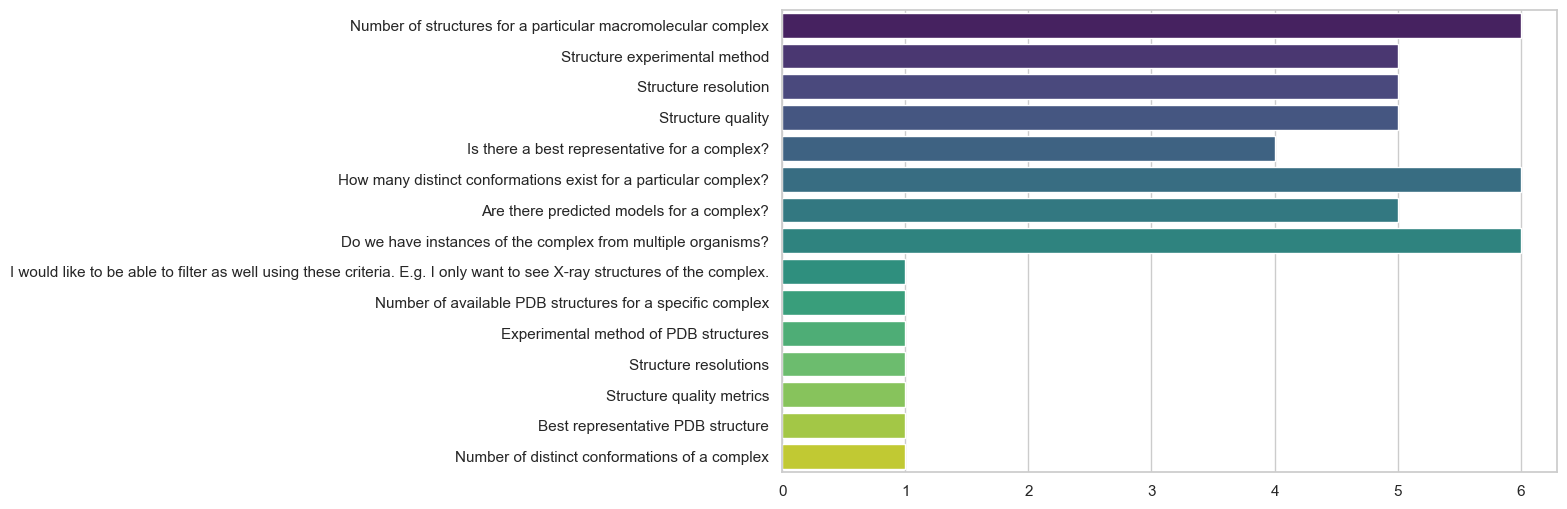

In [33]:
structure_info_dict = create_frequency_dict(structure_info)
plot = create_horizontal_bar_chart(structure_info_dict)
plot.show()

2. Which structure comparison features are relevant to your work?

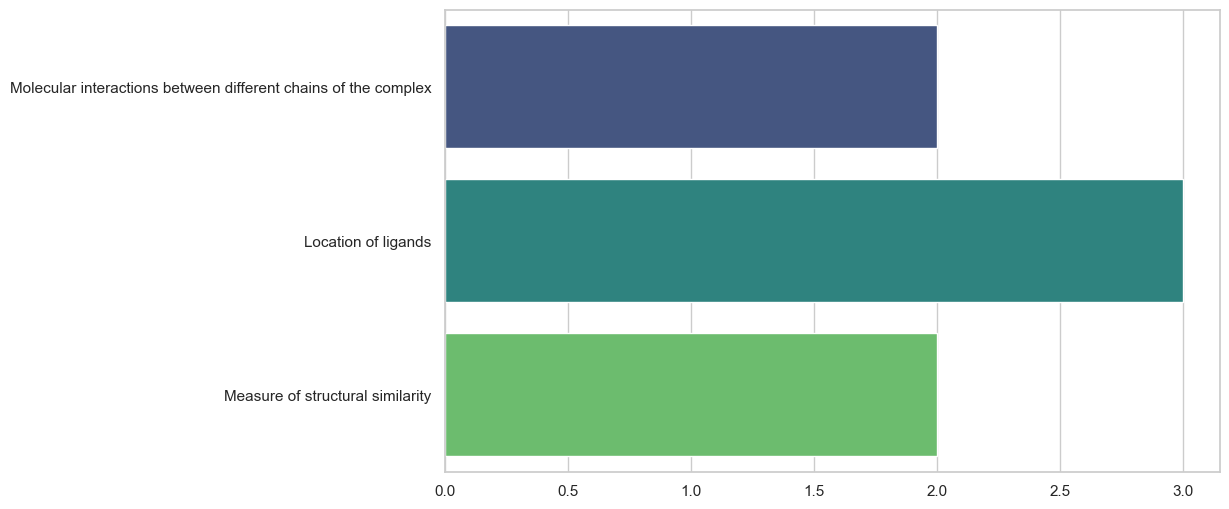

In [34]:
features_dict = create_frequency_dict(structure_comparison_features)
plot = create_horizontal_bar_chart(features_dict)
plot.show()

3. What other information related to structures of a complex would you find helpful? (Optional)

In [66]:
tokens = preprocess_text(other_structure_info)

In [67]:
# What are 10 most common words?
Counter(tokens).most_common(10)

[('like', 2),
 ('interface', 2),
 ('list', 2),
 ('need', 1),
 ('option', 1),
 ('download', 1),
 ('structure', 1),
 ('filter', 1),
 ('inspect', 1),
 ('complex', 1)]

In [68]:
# What are 10 most common trigrams?
result = generate_ngrams(tokens)
result.most_common(10)

[(('need', 'option', 'download'), 1),
 (('option', 'download', 'structure'), 1),
 (('download', 'structure', 'like'), 1),
 (('structure', 'like', 'filter'), 1),
 (('like', 'filter', 'inspect'), 1),
 (('filter', 'inspect', 'complex'), 1),
 (('inspect', 'complex', '3d'), 1),
 (('complex', '3d', 'like'), 1),
 (('3d', 'like', 'know'), 1),
 (('like', 'know', 'domain'), 1)]

In [69]:
texts = preprocess_topic_modeling(other_structure_info)
model = generate_topics_modeling(texts)
# Print the 3 main topics
pprint(model.print_topics())

[(0,
  '0.077*"constituent" + 0.077*"complex" + 0.077*"filter" + 0.077*"structure" '
  '+ 0.077*"chain" + 0.077*"option" + 0.077*"3d" + 0.077*"domain" + '
  '0.077*"inspect" + 0.077*"need"'),
 (1,
  '0.078*"like" + 0.077*"domain" + 0.077*"filter" + 0.077*"need" + 0.077*"3d" '
  '+ 0.077*"complex" + 0.077*"download" + 0.077*"chain" + 0.077*"inspect" + '
  '0.077*"option"'),
 (2,
  '0.127*"like" + 0.073*"know" + 0.073*"structure" + 0.073*"constituent" + '
  '0.073*"option" + 0.073*"inspect" + 0.073*"chain" + 0.073*"download" + '
  '0.073*"complex" + 0.073*"3d"')]


### Ligand interactions

1. What information on ligand interactions would be important to you work?

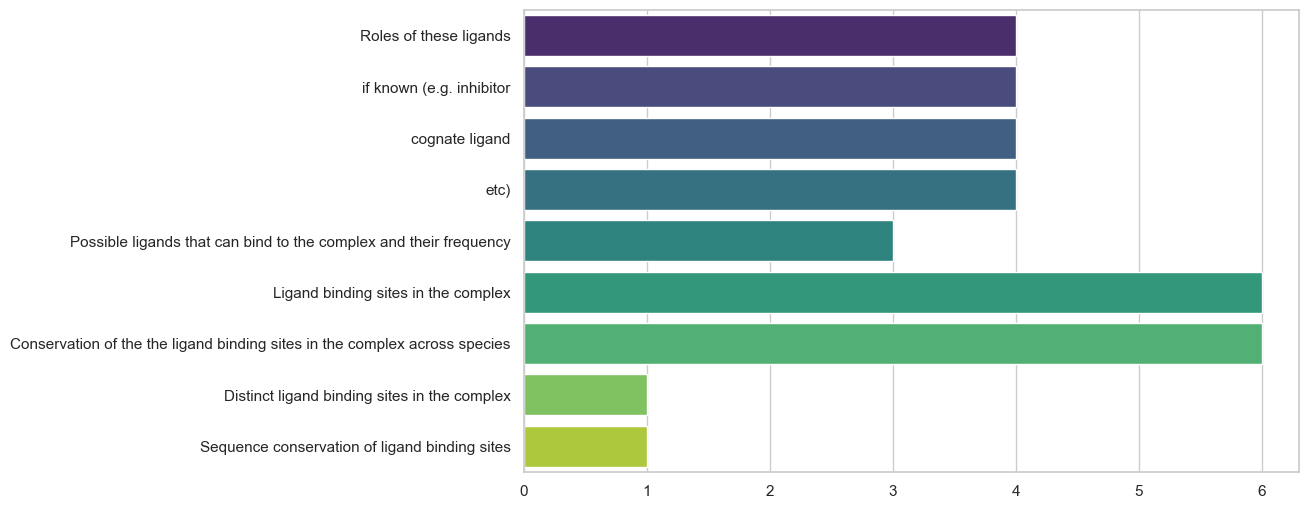

In [35]:
ligand_info_dict = create_frequency_dict(ligand_info)
plot = create_horizontal_bar_chart(ligand_info_dict)
plot.show()

2. What other information related to ligand interactions would you find helpful? (Optional)

In [70]:
tokens = preprocess_text(other_ligand_info)

In [71]:
# What are 10 most common words?
Counter(tokens).most_common(10)

[('ligand', 3),
 ('complex', 2),
 ('chain', 2),
 ('interested', 1),
 ('particular', 1),
 ('effect', 1),
 ('protein', 1),
 ('page', 1),
 ('list', 1),
 ('interact', 1)]

In [72]:
# What are 10 most common trigrams?
result = generate_ngrams(tokens)
result.most_common(10)

[(('interested', 'ligand', 'particular'), 1),
 (('ligand', 'particular', 'effect'), 1),
 (('particular', 'effect', 'complex'), 1),
 (('effect', 'complex', 'protein'), 1),
 (('complex', 'protein', 'page'), 1),
 (('protein', 'page', 'list'), 1),
 (('page', 'list', 'ligand'), 1),
 (('list', 'ligand', 'interact'), 1),
 (('ligand', 'interact', 'constituent'), 1),
 (('interact', 'constituent', 'chain'), 1)]

In [73]:
texts = preprocess_topic_modeling(other_ligand_info)
model = generate_topics_modeling(texts)
# Print the 3 main topics
pprint(model.print_topics())

[(0,
  '0.114*"ligand" + 0.080*"chain" + 0.080*"complex" + 0.045*"interesting" + '
  '0.045*"interface" + 0.045*"redundant" + 0.045*"single" + 0.045*"interested" '
  '+ 0.045*"effect" + 0.045*"disrupt"'),
 (1,
  '0.053*"ligand" + 0.053*"interact" + 0.053*"effect" + 0.053*"constituent" + '
  '0.053*"particular" + 0.053*"page" + 0.053*"bind" + 0.053*"single" + '
  '0.053*"chain" + 0.053*"interested"'),
 (2,
  '0.053*"complex" + 0.053*"ligand" + 0.053*"constituent" + 0.053*"chain" + '
  '0.053*"bind" + 0.053*"page" + 0.053*"free" + 0.053*"interaction" + '
  '0.053*"particular" + 0.053*"list"')]


### Annotations

1. What types of annotations related to macromolecular complexes are you interested in?

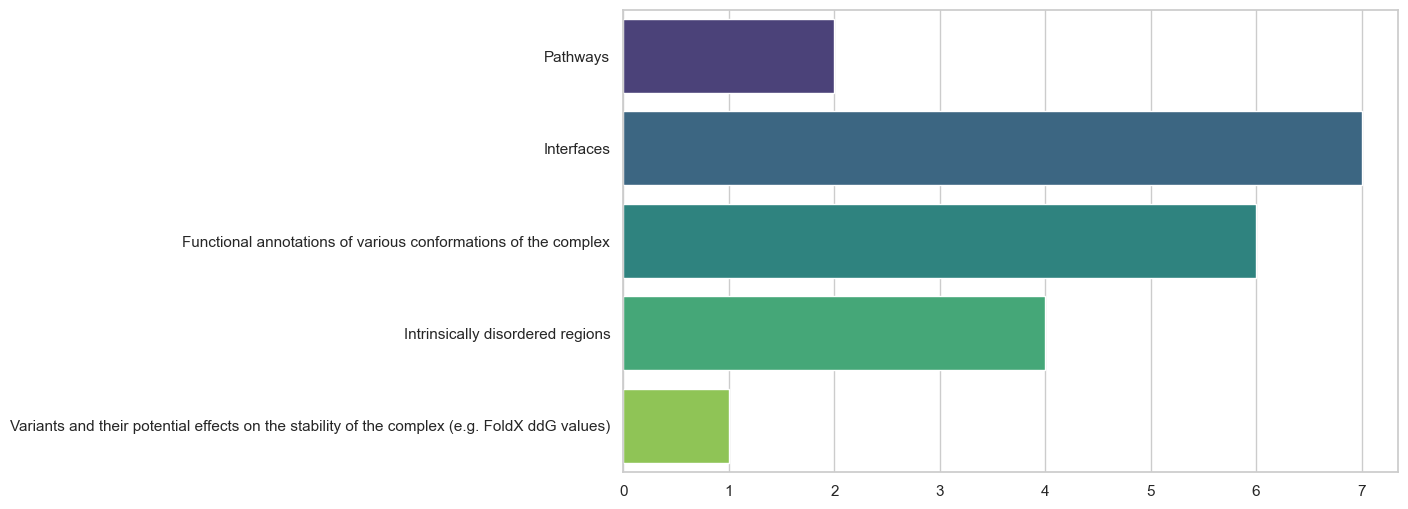

In [36]:
complex_annotations_dict = create_frequency_dict(complex_annotations)
plot = create_horizontal_bar_chart(complex_annotations_dict)
plot.show()

2. Which databases of software do you currently obtain these annotations from? (Optional)

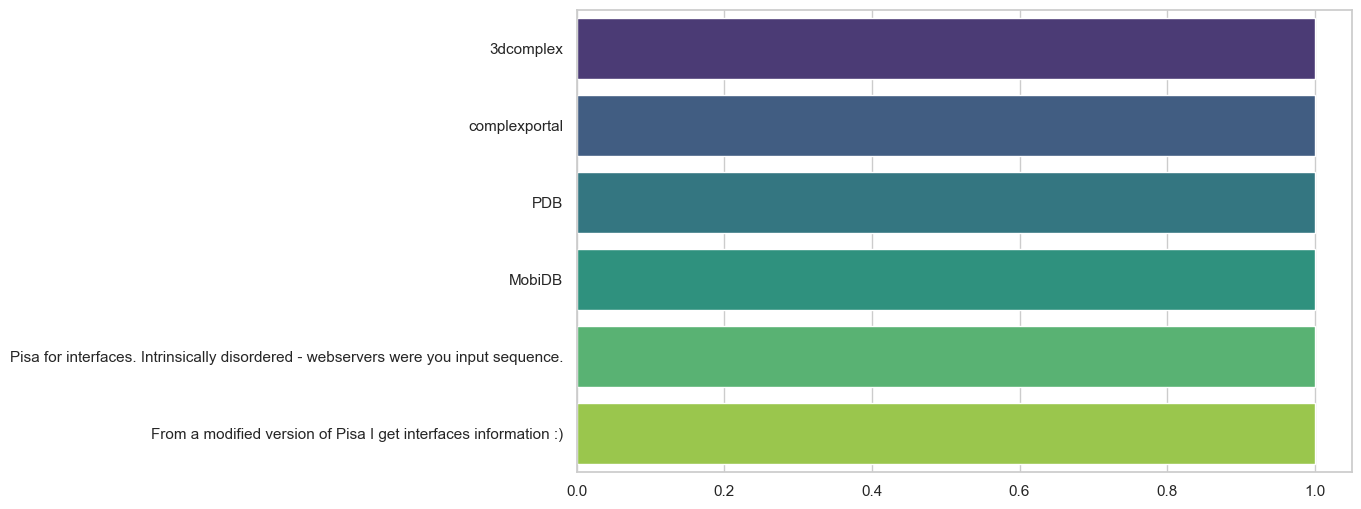

In [85]:
resources_dict = create_mixed_frequency_dict(complex_external_resources)
plot = create_horizontal_bar_chart(resources_dict)
plot.show()